## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


## Load the Dataset and perform Normalization

In [2]:
data = pd.read_csv('mnist_train.csv')  
print(data.head())
print("\n Dataset Shape:", data.shape)
X = data.drop('label', axis=1) 
y = data['label']
X = X / 255.0

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      3    0    0    0    0    0    0    0    0    0  ...      0      0   
2      8    0    0    0    0    0    0    0    0    0  ...      0      0   
3      9    0    0    0    0    0    0    0    0    0  ...      0      0   
4      3    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

 Dataset Shape: (30000, 785)


## Function to visualize confustion matrix

In [25]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

## Split X & Y into tranining and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a base model for comparison

Accuracy:  0.8416666666666667

Base Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       578
           1       0.90      0.95      0.92       633
           2       0.84      0.81      0.82       585
           3       0.78      0.80      0.79       613
           4       0.82      0.83      0.83       578
           5       0.79      0.81      0.80       550
           6       0.89      0.89      0.89       614
           7       0.87      0.88      0.88       633
           8       0.80      0.76      0.78       579
           9       0.80      0.79      0.79       637

    accuracy                           0.84      6000
   macro avg       0.84      0.84      0.84      6000
weighted avg       0.84      0.84      0.84      6000



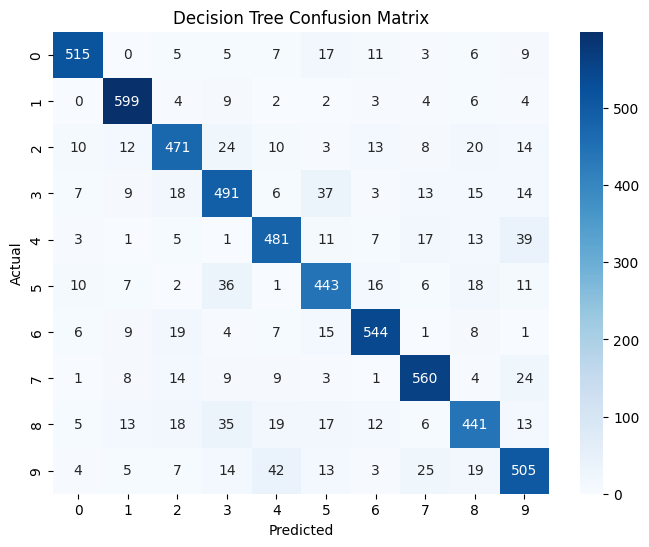

In [27]:
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
base_preds = base_model.predict(X_test)
print("Accuracy: " ,accuracy_score(y_test, base_preds))
print("\nBase Decision Tree:\n", classification_report(y_test, base_preds))
plot_confusion_matrix(y_test, base_preds, "Decision Tree Confusion Matrix")

## Bagging

Accuracy:  0.9476666666666667

Bagging:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       578
           1       0.97      0.98      0.97       633
           2       0.92      0.95      0.93       585
           3       0.94      0.91      0.92       613
           4       0.94      0.94      0.94       578
           5       0.93      0.94      0.93       550
           6       0.95      0.98      0.96       614
           7       0.97      0.95      0.96       633
           8       0.95      0.93      0.94       579
           9       0.94      0.93      0.93       637

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



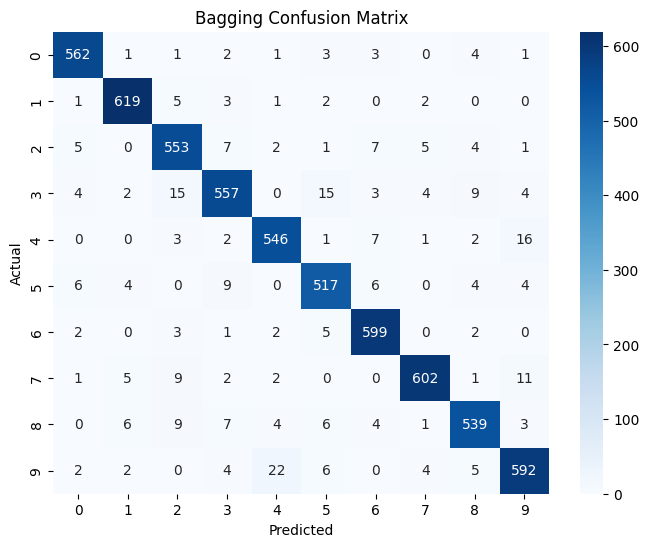

In [28]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
 n_estimators=50,
 max_samples=0.8,
 bootstrap=True,
 random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
print("Accuracy: " ,accuracy_score(y_test, bagging_preds))
print("\nBagging:\n", classification_report(y_test, bagging_preds))
plot_confusion_matrix(y_test, bagging_preds, "Bagging Confusion Matrix")


## Boosting - Gradient Boosting

Accuracy:  0.9541666666666667

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       578
           1       0.98      0.97      0.98       633
           2       0.93      0.95      0.94       585
           3       0.94      0.94      0.94       613
           4       0.95      0.96      0.95       578
           5       0.96      0.95      0.95       550
           6       0.97      0.97      0.97       614
           7       0.96      0.95      0.95       633
           8       0.95      0.94      0.95       579
           9       0.92      0.94      0.93       637

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



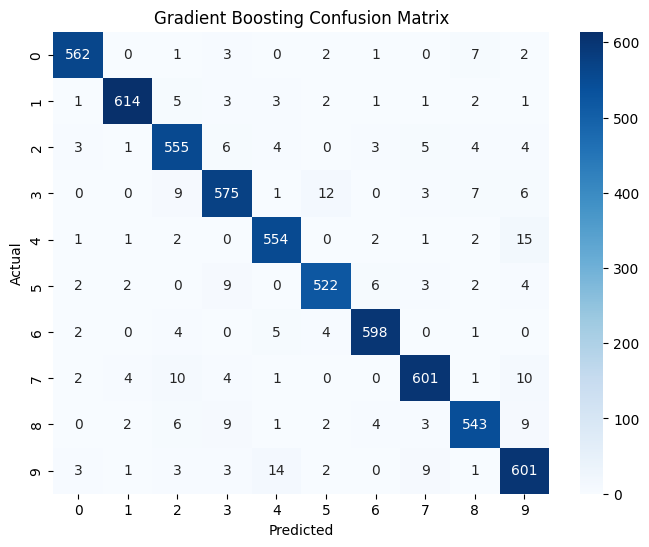

In [29]:
boosting_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=5,
    random_state=42
)
boosting_model.fit(X_train, y_train)
boosting_preds = boosting_model.predict(X_test)
print("Accuracy: " ,accuracy_score(y_test, boosting_preds))
print("\nGradient Boosting:\n", classification_report(y_test, boosting_preds))
plot_confusion_matrix(y_test, boosting_preds, "Gradient Boosting Confusion Matrix")


## Stacking

Accuracy:  0.9703333333333334

Stacking:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       578
           1       0.97      0.98      0.98       633
           2       0.97      0.96      0.96       585
           3       0.96      0.96      0.96       613
           4       0.97      0.99      0.98       578
           5       0.95      0.95      0.95       550
           6       0.99      0.99      0.99       614
           7       0.97      0.97      0.97       633
           8       0.97      0.95      0.96       579
           9       0.96      0.96      0.96       637

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



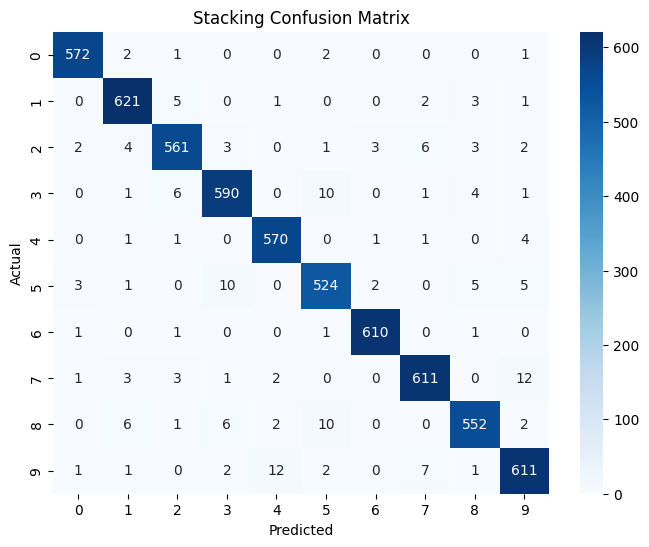

In [30]:
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5)),
 ('knn', KNeighborsClassifier(n_neighbors=5)),
 ('svm', SVC(probability=True, kernel='linear'))

]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(),passthrough=False,cv=5)
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)
print("Accuracy: " ,accuracy_score(y_test, stacking_preds))
print("\nStacking:\n", classification_report(y_test, stacking_preds))
plot_confusion_matrix(y_test, stacking_preds, "Stacking Confusion Matrix")


## Accuracy Comparison between the single decicion tree and the ensemble methodes

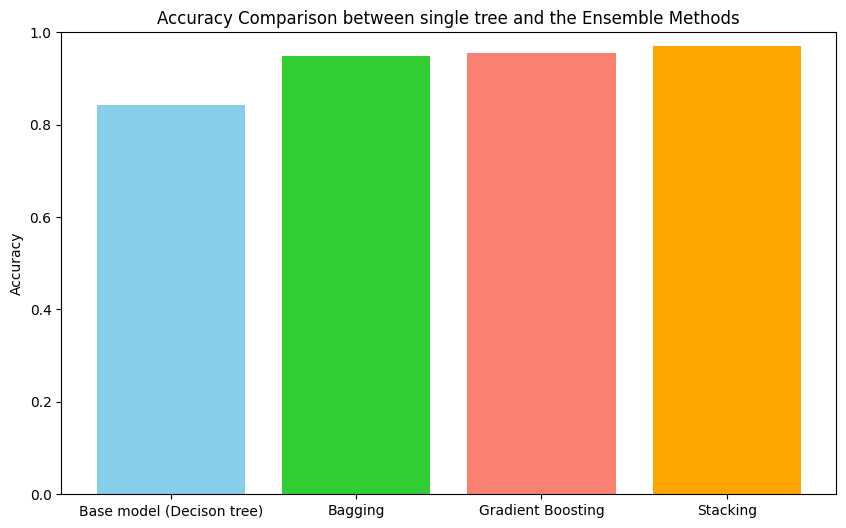

In [31]:
acc_base = accuracy_score(y_test, base_preds)
acc_rf = accuracy_score(y_test, bagging_preds)
acc_gb = accuracy_score(y_test, boosting_preds)
acc_stack = accuracy_score(y_test, stacking_preds)

model_names = ['Base model (Decison tree)', 'Bagging', 'Gradient Boosting', 'Stacking']
accuracies = [acc_base, acc_rf, acc_gb, acc_stack]
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'limegreen', 'salmon', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between single tree and the Ensemble Methods')
plt.show()
